In [28]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
datasets = pd.read_csv("/kaggle/input/behavioral-analytics-and-event-frequency/Behavioral Analytics and Event Frequency.csv")

In [30]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_Click_Binary   10000 non-null  int64  
 1   Product_Sales_Count     10000 non-null  int64  
 2   Attempts_Till_Success   10000 non-null  int64  
 3   Calls_Per_Hour          10000 non-null  int64  
 4   Item_Rating             10000 non-null  int64  
 5   Download_Time           10000 non-null  float64
 6   Temperature             10000 non-null  float64
 7   Time_Until_Event        10000 non-null  float64
 8   Insurance_Claims        10000 non-null  float64
 9   Ad_Click_Probability    10000 non-null  float64
 10  Late_Delivery_Count     10000 non-null  int64  
 11  Survey_Satisfaction     10000 non-null  int64  
 12  App_Open_Duration       10000 non-null  float64
 13  Sensor_Deviation        10000 non-null  float64
 14  Refund_Requests         10000 non-null 

In [31]:
N =len(datasets)
print("Population size:",N)
n = 100

Population size: 10000


# Simple Random Sampling

In [32]:
SR_sampling = datasets.sample(n=n,
                     random_state = 42) 
print("Type of the sample is:", type(SR_sampling ))
print("Simple Random Sampling:",SR_sampling )

Type of the sample is: <class 'pandas.core.frame.DataFrame'>
Simple Random Sampling:       Customer_Click_Binary  Product_Sales_Count  Attempts_Till_Success  \
6252                      0                   12                      2   
4684                      1                   12                      1   
1731                      0                   10                     10   
4742                      1                   11                      4   
4521                      1                   11                      1   
...                     ...                  ...                    ...   
3787                      1                   11                      2   
9189                      1                   10                      3   
7825                      0                    9                      1   
7539                      1                   15                      3   
7231                      0                   16                      4   

      Calls_Pe

In [33]:
print(" Number of sample size:", len( SR_sampling))

 Number of sample size: 100


[6252, 4684, 1731, 4742, 4521, 6340, 576, 5202, 6363, 439, 2750, 7487, 5272, 5653, 3999, 6033, 582, 9930, 7051, 8158, 9896, 2249, 4640, 9485, 4947, 9920, 1963, 8243, 6590, 8847, 321, 2678, 4625, 4949, 8328, 3337, 5589, 251, 3973, 6630, 5547, 35, 8362, 1513, 9317, 39, 4819, 3465, 1760, 2304, 3723, 8284, 4993, 8127, 3032, 7938, 3039, 9655, 2545, 2592, 1188, 7966, 6077, 107, 1315, 8187, 2753, 9753, 6231, 2876, 5323, 799, 3570, 2894, 2927, 8178, 971, 6687, 8575, 2020, 9054, 952, 5359, 3857, 5861, 3145, 3305, 3006, 9001, 7770, 7438, 7942, 9238, 1056, 3154, 3787, 9189, 7825, 7539, 7231]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


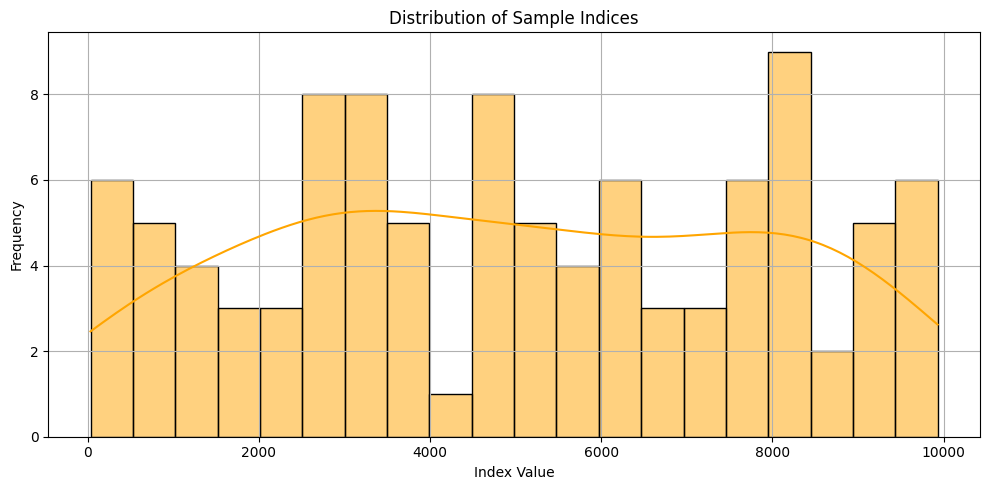

In [34]:
df_sample = SR_sampling.index.tolist()
print(df_sample)

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_sample, bins=20, kde=True, color='orange')
plt.title('Distribution of Sample Indices')
plt.xlabel('Index Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


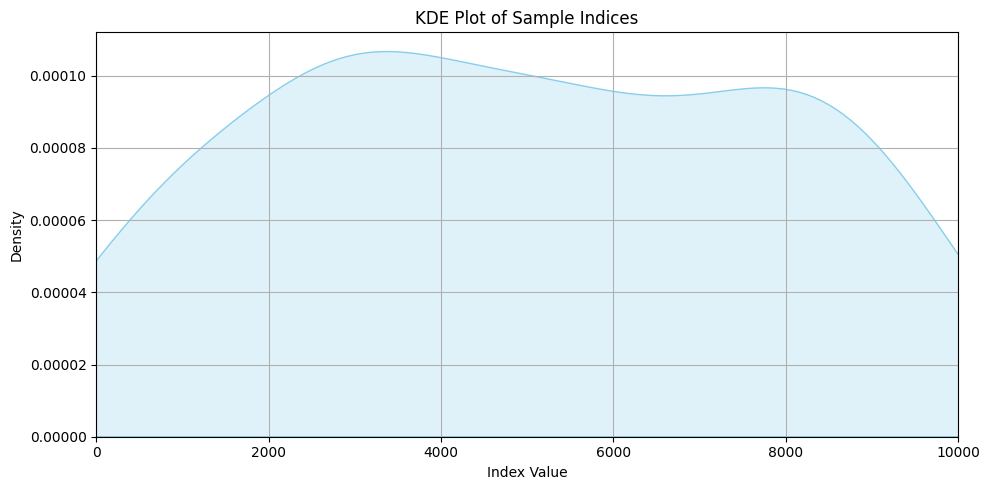

In [35]:


df_sample = SR_sampling.index.tolist()

plt.figure(figsize=(10, 5))
sns.kdeplot(df_sample, fill=True, color='skyblue') #Kernel Density Estimation (KDE)
plt.xlim(0, 10000)# Smooth wave/bell curve
plt.title('KDE Plot of Sample Indices')
plt.xlabel('Index Value')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()


# Inclusion Probability

In [36]:
inclusion_prob = n/N
print("Inclusion probability for Simple Random Sampling:",inclusion_prob)
SR_sampling["inclusion_prob"]= inclusion_prob
SR_sampling

Inclusion probability for Simple Random Sampling: 0.01


,Customer_Click_Binary,Product_Sales_Count,Attempts_Till_Success,Calls_Per_Hour,Item_Rating,Download_Time,Temperature,Time_Until_Event,Insurance_Claims,Ad_Click_Probability,...,Waiting_Time,Transaction_Amount,Purchase_Probability,Content_Sharing_Rate,Temperature_Sensor2,Order_Shipping_Days,Rating_Consistency,Clicks_Per_Session,Visits_Until_Purchase,inclusion_prob
6252,0,12,2,4,1,7.077190,36.809319,2.947703,1221.927239,0.371727,...,1.033579,745.820538,0.642303,0.811806,36.325584,5,0.503238,10,14,0.01
4684,1,12,1,5,5,4.043445,37.486588,6.379245,815.807448,0.271380,...,1.376616,839.815231,0.980268,0.428207,36.411374,6,0.743506,13,24,0.01
1731,0,10,10,6,2,7.497563,36.754288,1.576600,2518.908345,0.338590,...,6.894125,1433.415391,0.920821,0.464477,36.176786,4,0.808173,11,25,0.01
4742,1,11,4,7,1,9.144568,36.207785,0.337681,2735.114690,0.161137,...,1.026214,1257.901693,0.605625,0.256486,36.775269,1,0.960296,10,11,0.01
4521,1,11,1,3,2,5.594144,36.531141,1.183150,3998.919987,0.150760,...,4.232571,1002.287351,0.551814,0.592493,36.392717,1,0.786125,14,1,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,1,11,2,2,1,6.957397,38.214751,2.181132,612.493424,0.024038,...,5.132088,466.802045,0.654387,0.720726,36.354101,6,0.964598,9,6,0.01
9189,1,10,3,3,3,8.830117,36.627975,0.686970,1866.018692,0.059882,...,1.927070,1424.804404,0.590398,0.630632,36.138578,4,0.215180,8,8,0.01
7825,0,9,1,5,2,8.462819,37.494778,0.135964,3131.078226,0.084567,...,1.985775,2681.750894,0.413050,0.236078,36.339341,7,0.844005,10,10,0.01
7539,1,15,3,4,5,7.608262,36.562175,0.072312,531.141489,0.151973,...,2.009189,2056.186617,0.873659,0.688108,36.740014,5,0.673425,10,34,0.01


# Systematic Sampling

In [37]:
def sys_sampling(datasets, n =100):
    N = len(datasets)
    n = n
    k = N//n # for getting kth value as it requires postion
    starting = np.random.randint(0,k)
    dataIndex = list(range(starting, starting + k * n, k))[:n]
    return datasets.iloc[dataIndex]

df_sys_sampling =sys_sampling(datasets)
df_sys_sampling



,Customer_Click_Binary,Product_Sales_Count,Attempts_Till_Success,Calls_Per_Hour,Item_Rating,Download_Time,Temperature,Time_Until_Event,Insurance_Claims,Ad_Click_Probability,...,Retries_Before_Success,Waiting_Time,Transaction_Amount,Purchase_Probability,Content_Sharing_Rate,Temperature_Sensor2,Order_Shipping_Days,Rating_Consistency,Clicks_Per_Session,Visits_Until_Purchase
69,1,14,1,5,5,5.399802,36.594974,0.804601,558.564569,0.173096,...,2,1.120650,740.792178,0.536799,0.606243,37.057028,6,0.308584,6,19
169,1,11,1,5,2,4.284997,36.063782,1.622155,2335.827664,0.214691,...,2,0.467948,1465.680547,0.647015,0.620167,36.451105,5,0.013823,9,26
269,0,12,1,9,3,9.820278,37.108338,0.150424,1835.393623,0.090572,...,5,0.346275,149.096580,0.827201,0.429578,36.035699,1,0.530656,7,4
369,0,12,2,4,2,6.044172,36.752022,0.314379,1154.024541,0.221913,...,10,0.126948,1256.464767,0.848510,0.357863,35.992682,1,0.670390,9,6
469,0,14,3,3,3,9.126313,36.129590,3.854512,1395.211314,0.373160,...,3,1.346725,638.246962,0.887341,0.528410,36.747242,2,0.100387,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9569,1,13,1,6,2,4.148964,37.001322,0.668499,881.784467,0.561144,...,4,0.893669,1678.213079,0.747483,0.695845,36.575004,1,0.953320,12,12
9669,0,19,2,3,5,8.536946,37.489324,0.192253,2150.335752,0.254712,...,2,0.294113,1654.786282,0.380068,0.578816,36.497490,3,0.039896,7,17
9769,0,15,2,5,5,5.034652,36.835796,0.619615,2041.039742,0.023789,...,5,3.191876,673.164663,0.822320,0.544111,36.627981,4,0.766314,7,37
9869,1,14,14,5,1,3.630450,37.725937,1.526135,217.221584,0.152929,...,8,2.007258,855.181920,0.836459,0.666056,35.884572,5,0.430952,8,9


In [42]:
df2 = df_sys_sampling.index.tolist()
df2

[69,
 169,
 269,
 369,
 469,
 569,
 669,
 769,
 869,
 969,
 1069,
 1169,
 1269,
 1369,
 1469,
 1569,
 1669,
 1769,
 1869,
 1969,
 2069,
 2169,
 2269,
 2369,
 2469,
 2569,
 2669,
 2769,
 2869,
 2969,
 3069,
 3169,
 3269,
 3369,
 3469,
 3569,
 3669,
 3769,
 3869,
 3969,
 4069,
 4169,
 4269,
 4369,
 4469,
 4569,
 4669,
 4769,
 4869,
 4969,
 5069,
 5169,
 5269,
 5369,
 5469,
 5569,
 5669,
 5769,
 5869,
 5969,
 6069,
 6169,
 6269,
 6369,
 6469,
 6569,
 6669,
 6769,
 6869,
 6969,
 7069,
 7169,
 7269,
 7369,
 7469,
 7569,
 7669,
 7769,
 7869,
 7969,
 8069,
 8169,
 8269,
 8369,
 8469,
 8569,
 8669,
 8769,
 8869,
 8969,
 9069,
 9169,
 9269,
 9369,
 9469,
 9569,
 9669,
 9769,
 9869,
 9969]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


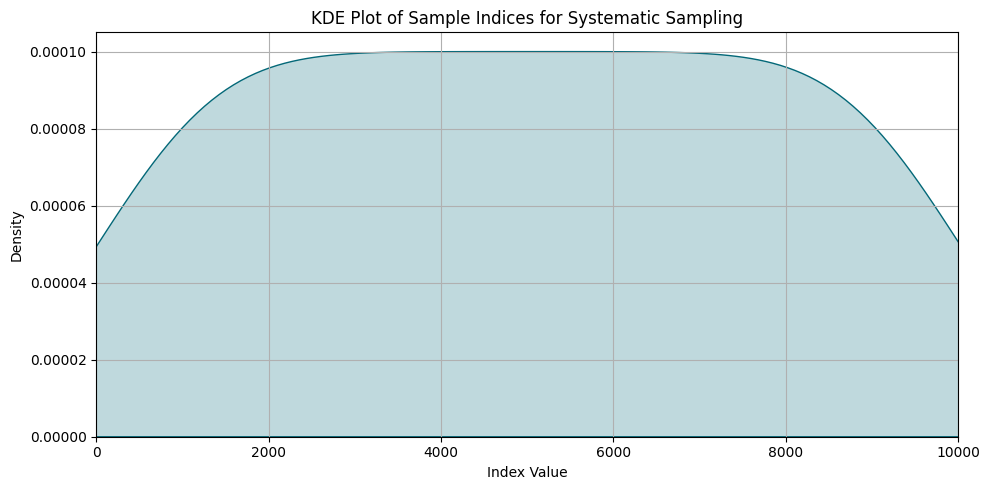

In [46]:


plt.figure(figsize=(10, 5))
sns.kdeplot(df2, fill=True, color='#036878') #Kernel Density Estimation (KDE)
plt.xlim(0, 10000)# Smooth wave/bell curve
plt.title('KDE Plot of Sample Indices for Systematic Sampling')
plt.xlabel('Index Value')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()
